# Pymaceuticals Inc.
---

### Analysis
Summary - After analysis of the provided data for 248 mice, treated with 9 different drug regiments and 1 placebo, we can drow conclusion that the mice which were treated with the Pymaceuticals’ drug of interest, Capomulin, have shown a good response against the other treatment regimens. Other drug regimen that had good results was Ramicane. The mice treated with the Capomulin and the Ramicane have shown reduction of the tumor size. The corelation coefficient between mouse weight and average tumor volume for the Capomulin regimen is: 0.84.

Data collection and preparation - For this analysis was used data provided by the most recent Pymaceuticals’ animal study. After merging the data into one data frame and getting the unique values for every mouse, we found that there was one duplicate Mouse ID which was dropped from the original data, and we continued working with the clean data that we now had. The distribution of female versus male mice was 49% vs. 51%.

Analysis methods - In this analysis were used Python, Matplotlib, Jupyter Notebook, Pandas and Statistics.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
combined_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [32]:
# Checking the number of mice.
mice_count = combined_study['Mouse ID'].value_counts()
mice_count = len(mice_count)
mice_count

249

In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_study[combined_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice.value_counts()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex     Age_months  Weight (g)
g989      0          45.000000           0                 Propriva      Female  21          26            1
          5          47.570392           0                 Propriva      Female  21          26            1
          10         49.880528           0                 Propriva      Female  21          26            1
          15         53.442020           0                 Propriva      Female  21          26            1
          20         54.657650           1                 Propriva      Female  21          26            1
dtype: int64

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined_study.loc[combined_study['Mouse ID'] == 'g989', :]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_study.loc[combined_study['Mouse ID'] != 'g989', :]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [36]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data['Mouse ID'].value_counts()
clean_count = len(clean_count)
clean_count

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tu_volume = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median_tu_volume = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
variance_tu_volume = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std_tu_volume = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem_tu_volume = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Assemble the resulting series into a single summary DataFrame.
summary_results = pd.DataFrame({'Tumor Volume (mean)' : mean_tu_volume,
                                'Tumor Volume (median)' : median_tu_volume,
                                'Tumor Volume (variance)' : variance_tu_volume,
                                'Tumor Volume (standard deviation)' : std_tu_volume,
                                'Tumor Volume (sem)' : sem_tu_volume})
summary_results


,Tumor Volume (mean),Tumor Volume (median),Tumor Volume (variance),Tumor Volume (standard deviation),Tumor Volume (sem)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Using the aggregation method, produce the same summary statistics in a single line.

summary_results = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
summary_results

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

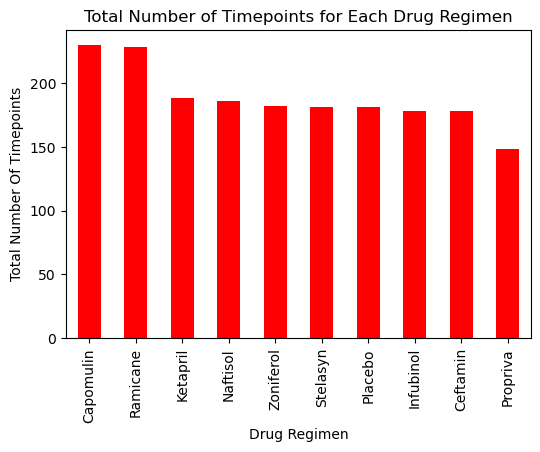

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind="bar", facecolor = 'red', figsize = (6,4), 
            title = 'Total Number of Timepoints for Each Drug Regimen',
            xlabel = 'Drug Regimen', 
            ylabel='Total Number Of Timepoints')
plt.show()


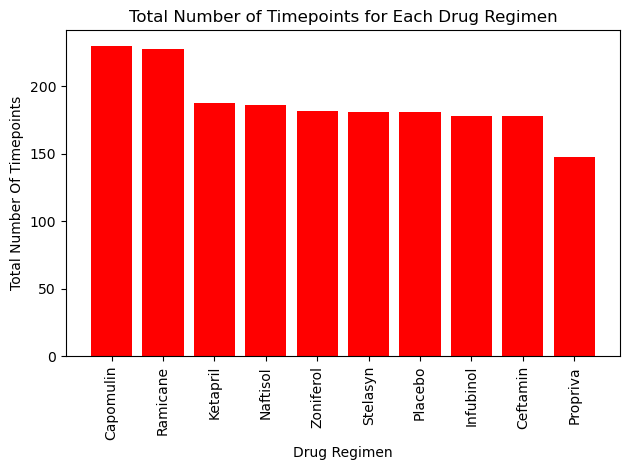

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_data['Drug Regimen'].value_counts()

plt.bar(counts.index.values, counts.values, color = 'red', align = 'center')
plt.xticks(rotation = 'vertical')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number Of Timepoints")
plt.tight_layout()
plt.show()



<Axes: title={'center': 'Female Vs. Male Mice Distribution'}, ylabel='Sex'>

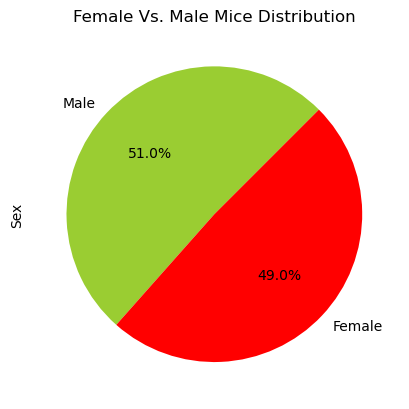

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
MaleVsFemale = clean_data['Sex'].value_counts()
MaleVsFemale.plot(kind='pie', title = 'Female Vs. Male Mice Distribution', colors = ('yellowgreen', 'red'), autopct='%1.1f%%', startangle=45)

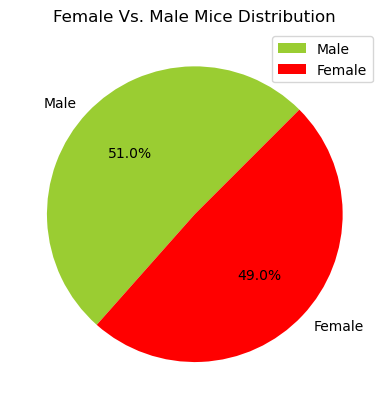

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
MaleVsFemale = clean_data['Sex'].value_counts()
labels = ['Male', 'Female']
colors = ['yellowgreen', 'red']
explode = (0, 0.05)

plt.title('Female Vs. Male Mice Distribution')
plt.pie(MaleVsFemale,labels=labels, colors=colors, autopct='%1.1f%%', startangle=45)
plt.legend(loc='best')
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regiments = combined_study.loc[(combined_study['Drug Regimen'] == 'Capomulin') | (combined_study['Drug Regimen'] == 'Ramicane') | (combined_study['Drug Regimen'] == 'Infubinol') | (combined_study['Drug Regimen'] == 'Ceftamin'), :] 

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = treatment_regiments.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tu_volume_df = pd.merge(max_timepoint_df, clean_data, on=('Mouse ID', 'Timepoint'))
tu_volume_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tu_volume_df.loc[tu_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_volume.append(final_tumor_vol)
#print(tumor_volume)
    
    #Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} and values above {upper_bound} could be outliers for {drug}.")


Values below 20.70456164999999 and values above 51.83201549 could be outliers for Capomulin.
Values below 17.912664470000003 and values above 54.30681135 could be outliers for Ramicane.
Values below 36.83290494999999 and values above 82.74144559000001 could be outliers for Infubinol.
Values below 25.355449580000002 and values above 87.66645829999999 could be outliers for Ceftamin.


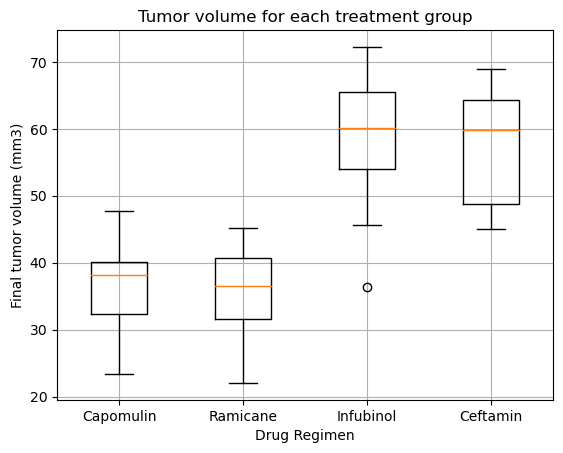

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume for each treatment group')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final tumor volume (mm3)')
ax1.boxplot(tumor_volume, labels = treatments)
plt.grid()
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Time Point for a mouse ID b128 treated with Capomulin')

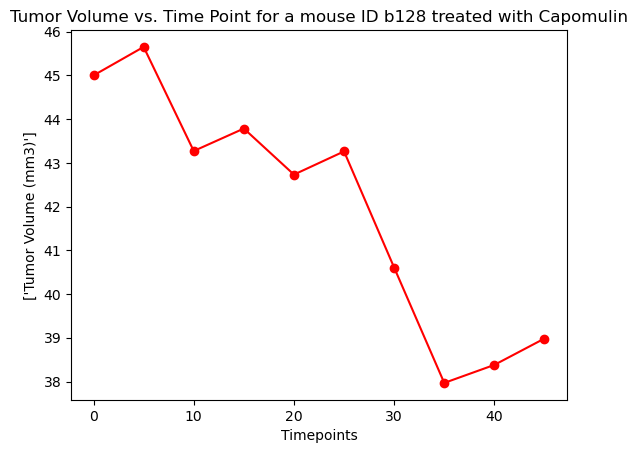

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128 = combined_study.loc[combined_study['Mouse ID'] == 'b128', :]
x_axis = b128['Timepoint']
y_axis = b128['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis, marker = 'o', color = 'r')
plt.xlabel('Timepoints')
plt.ylabel(['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Time Point for a mouse ID b128 treated with Capomulin')


In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = combined_study.loc[combined_study['Drug Regimen'] == 'Capomulin', :]
capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


C:\Users\anita\AppData\Local\Temp\ipykernel_7988\2190862889.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_regimen = capomulin.groupby(['Mouse ID']).mean()


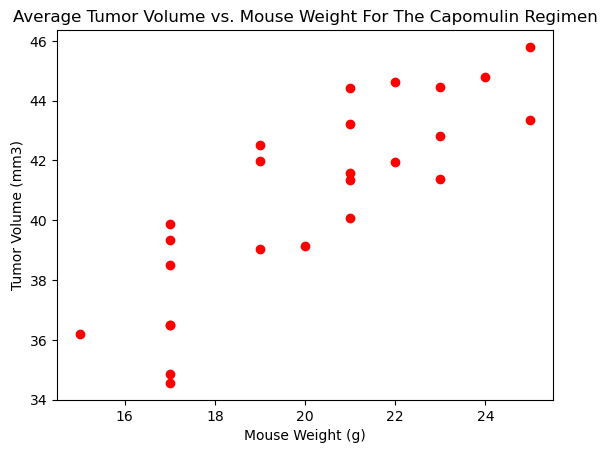

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = combined_study.loc[combined_study['Drug Regimen'] == 'Capomulin', :]
capomulin_regimen = capomulin.groupby(['Mouse ID']).mean()
x_values = capomulin_regimen['Weight (g)']
y_values = capomulin_regimen['Tumor Volume (mm3)']
plt.scatter(x_values, y_values, color = 'r')
plt.title('Average Tumor Volume vs. Mouse Weight For The Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The r-squared is: 0.7088568047708723
The corelation coefficient between mouse weight and average tumor volume for the Capomulin regimen is: 0.84


C:\Users\anita\AppData\Local\Temp\ipykernel_7988\3501541973.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_regimen = capomulin.groupby(['Mouse ID']).mean()


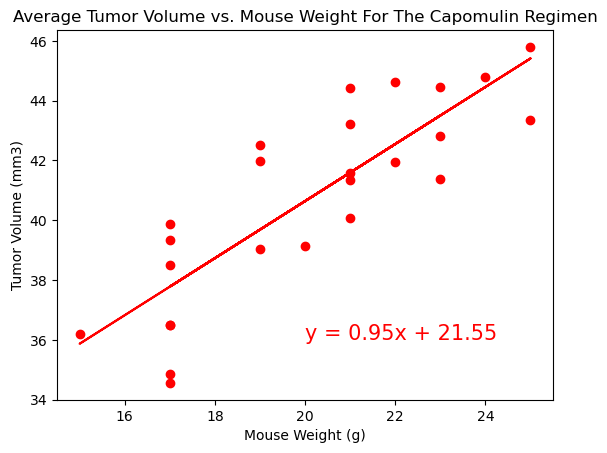

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin = combined_study.loc[combined_study['Drug Regimen'] == 'Capomulin', :]
capomulin_regimen = capomulin.groupby(['Mouse ID']).mean()
x_values = capomulin_regimen['Weight (g)']
y_values = capomulin_regimen['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values, y_values, color = 'r')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36), fontsize=15,color="red")
plt.title('Average Tumor Volume vs. Mouse Weight For The Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
print(f'The corelation coefficient between mouse weight and average tumor volume for the Capomulin regimen is: {round(correlation[0],2)}')
plt.show()